# Fitness Tracker Dataset
## BSDSF22M011-Muhammad Ali Raza

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv


# Load Dataset

In [2]:
df = pd.read_csv("/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


# Inspect Dataset

In [3]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(1800, 15)
Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 n

# Check for Missing Values

In [4]:
print(df.isnull().sum())

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64


# Visualizing Missing Values

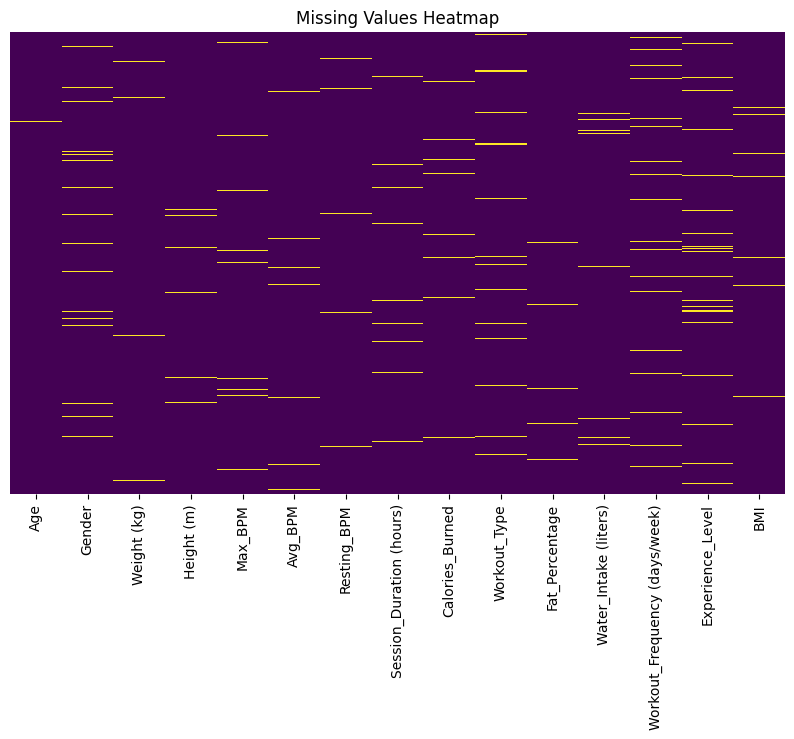

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Handling Missing Values

In [10]:
import math
mean_age = math.ceil(df['Age'].mean())
df['Age'].fillna(mean_age)
print(df['Age'].isnull().sum())
print(df['Age'].unique())

0
[34. 26. 22. 54. 38. 44. 50. 18. 39. 46. 19. 56. 30. 23. 35. 36. 25. 59.
 32. 28. 27. 20. 51. 52. 21. 48. 37. 49. 42. 24. 33. 47. 45. 55. 41. 29.
 43. 57. 31. 53. 58. 40.]


In [17]:
mean_weight = df['Weight (kg)'].mean()
df['Weight (kg)'].fillna(mean_weight)
print(df['Weight (kg)'].isnull().sum())

0


In [15]:
mean_height = df['Height (m)'].mean()
df['Height (m)'].fillna(mean_height)
print(df['Height (m)'].isnull().sum())

0


In [16]:
df['Max_BPM'] = df['Max_BPM'].fillna(0)
df['Max_BPM'] = df['Max_BPM'].astype(str)
df['Max_BPM'] = df['Max_BPM'].str.strip('nt\\t\n')
df['Max_BPM'] = df['Max_BPM'].astype(int)
median_max_bpm = df['Max_BPM'].median()
df['Max_BPM'] = df['Max_BPM'].replace(0, median_max_bpm)
print(df['Max_BPM'].isnull().sum())

0


In [21]:
mean_avg_bpm = df['Avg_BPM'].mean()
df['Avg_BPM'].fillna(mean_avg_bpm)
print(df['Avg_BPM'].isnull().sum())

0


In [22]:
df['Session_Duration (hours)'] = df['Session_Duration (hours)'].fillna(0)
median_session_dur = df['Session_Duration (hours)'].median()
df['Session_Duration (hours)'] = df['Session_Duration (hours)'].replace(0, median_session_dur)
print(df['Session_Duration (hours)'].isnull().sum())

0


In [23]:
df['Workout_Type'] = df['Workout_Type'].fillna('0')
df['Workout_Type'] = df['Workout_Type'].str.strip('n\\t\n')
mode_workout_type = df['Workout_Type'].mode()[0]
df['Workout_Type'] = df['Workout_Type'].replace('0', mode_workout_type)
print(df['Workout_Type'].isnull().sum())
print(df['Workout_Type'].unique())

0
['Strength' 'Cardio' 'HIIT' 'Yoga']


In [25]:
df['Calories_Burned'] = df['Calories_Burned'].fillna(0)
median_calories_burned = df['Calories_Burned'].median()
df['Calories_Burned'] = df['Calories_Burned'].replace(0, median_calories_burned)
print(df['Calories_Burned'].isnull().sum())

0


In [28]:
df['Gender'] = df['Gender'].fillna('0')
mode_gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].replace('0', mode_gender)
print(df['Gender'].isnull().sum())
print(df['Gender'].unique())

0
['Female' 'Male']


In [31]:
mean_bmi= df['BMI'].mean()
df['BMI'].fillna(mean_bmi)
print(df['BMI'].isnull().sum())

0


# Checking Duplicate Rows

In [46]:
df.duplicated().sum()

0

# Re-Calculating BMI

In [33]:
df['BMI'] = df['Weight (kg)'] / (df['Height (m)'] ** 2)
print(df['BMI'])

0       25.060701
1       25.291887
2       18.933528
3       22.732762
4       17.439556
          ...    
1795    22.125000
1796    29.515773
1797    20.705340
1798    16.859889
1799    21.565755
Name: BMI, Length: 1800, dtype: float64


# Calculating Workout Intensity

In [34]:
df['Workout_Intensity'] = df['Avg_BPM'] / df['Max_BPM']
df['Workout_Intensity']

0       0.873563
1       0.939759
2       0.887701
3       0.903743
4       0.954802
          ...   
1795    0.774566
1796    1.030488
1797    0.686170
1798    0.844444
1799    0.847826
Name: Workout_Intensity, Length: 1800, dtype: float64

# Visualizing Distributions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


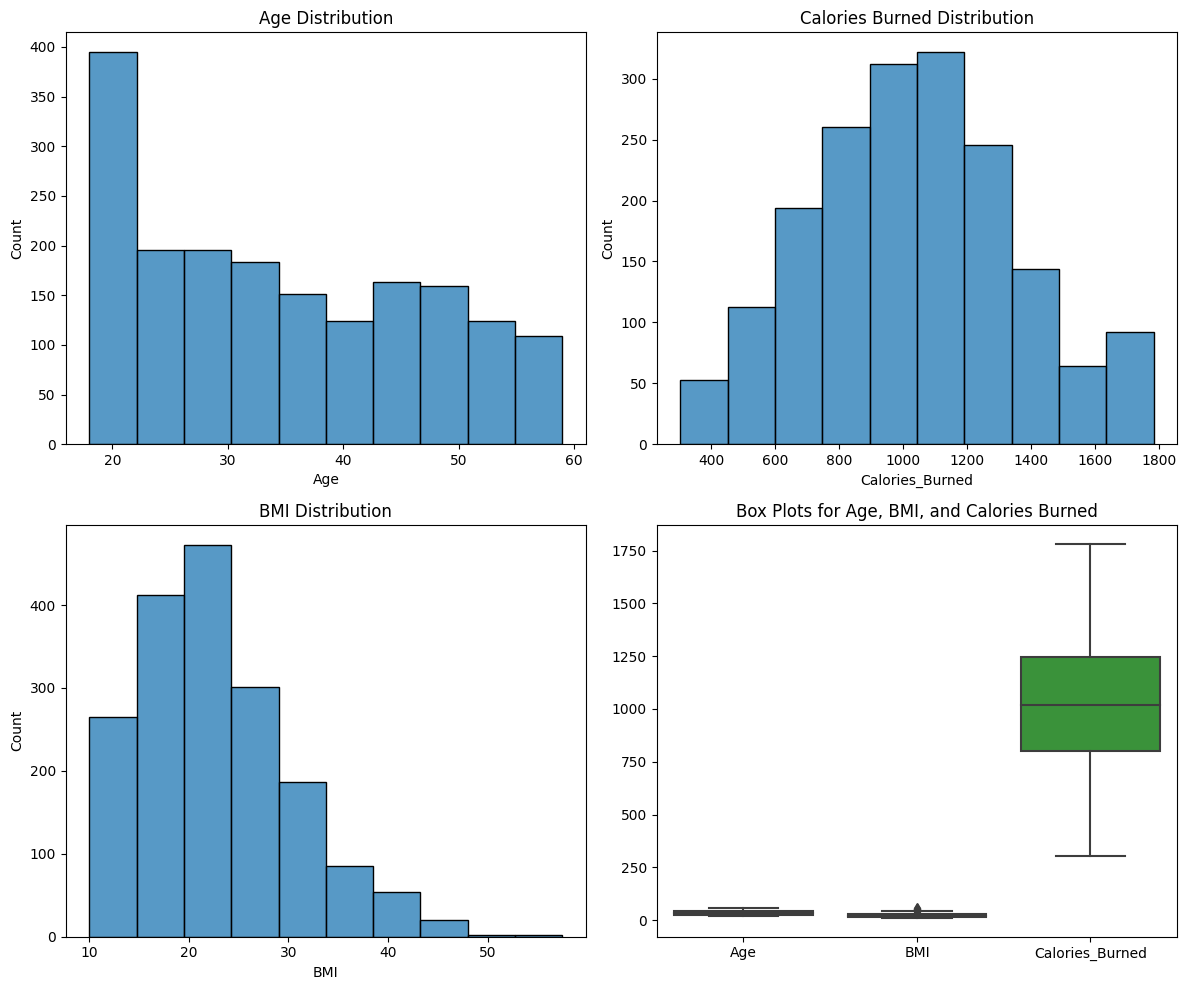

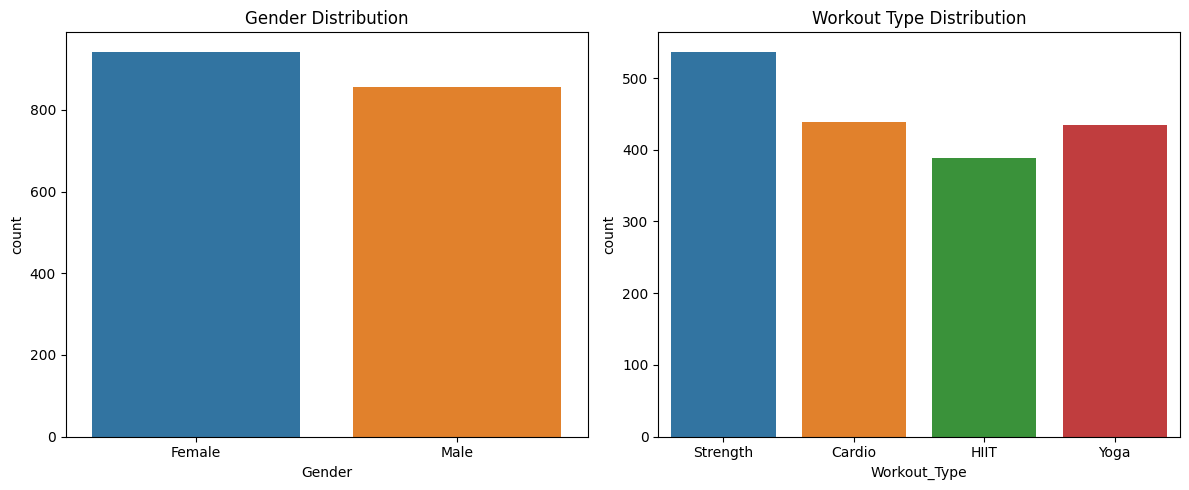

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Calories_Burned'], bins=10)
plt.title('Calories Burned Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], bins=10)
plt.title('BMI Distribution')

plt.subplot(2, 2, 4)
sns.boxplot(data=df[['Age', 'BMI', 'Calories_Burned']])
plt.title('Box Plots for Age, BMI, and Calories Burned')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Workout_Type', data=df)
plt.title('Workout Type Distribution')

plt.tight_layout()
plt.show()


# Visualizing Relationships

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


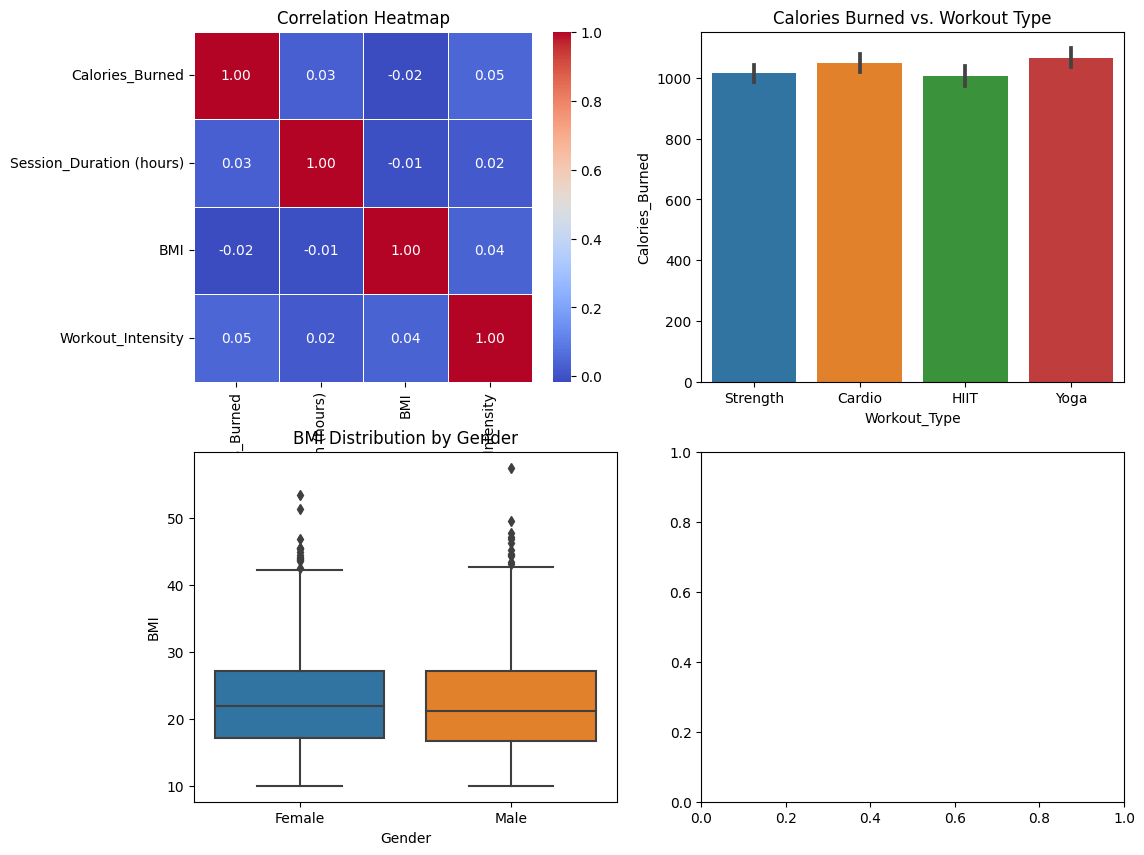

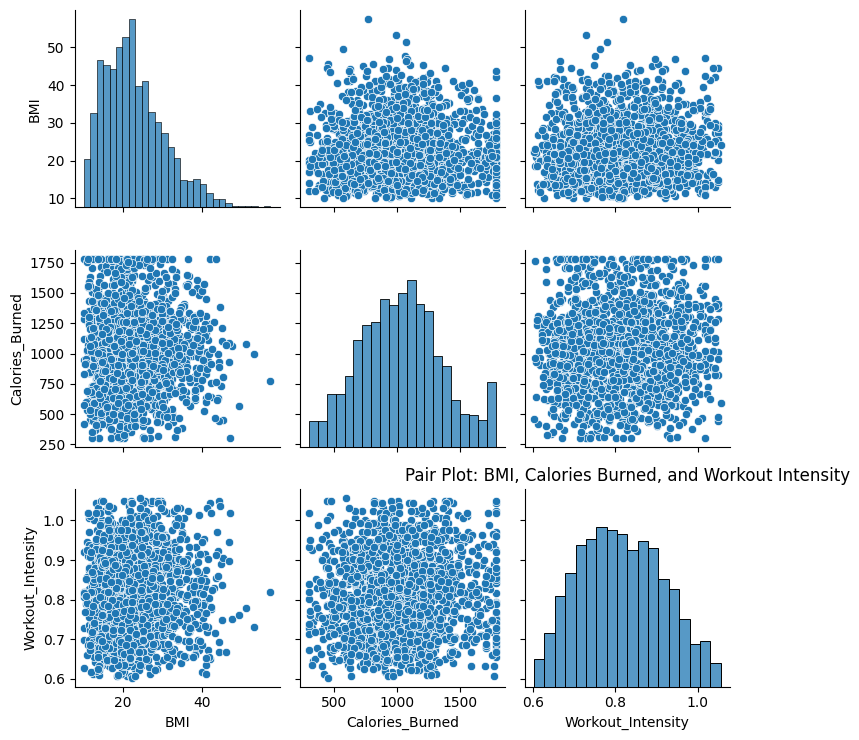

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
correlation_matrix = df[['Calories_Burned', 'Session_Duration (hours)', 'BMI', 'Workout_Intensity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')

plt.subplot(2, 2, 2)
sns.barplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Calories Burned vs. Workout Type')

plt.subplot(2, 2, 3)
sns.boxplot(x='Gender', y='BMI', data=df)
plt.title('BMI Distribution by Gender')

plt.subplot(2, 2, 4)
sns.pairplot(df[['BMI', 'Calories_Burned', 'Workout_Intensity']])
plt.title('Pair Plot: BMI, Calories Burned, and Workout Intensity')

plt.tight_layout()
plt.show()


# Encoding Categorical Features

In [41]:
df_one_hot = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=False)
df_one_hot

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Intensity,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,34.0,86.7,1.86,174,152.0,74.0,1.12,712.0,12.8,2.4,5.0,2.0,25.060701,0.873563,True,False,False,False,True,False
1,26.0,84.7,1.83,166,156.0,73.0,1.00,833.0,27.9,2.8,5.0,2.0,25.291887,0.939759,True,False,False,False,True,False
2,22.0,64.8,1.85,187,166.0,64.0,1.24,1678.0,28.7,1.9,3.0,2.0,18.933528,0.887701,False,True,True,False,False,False
3,54.0,75.3,1.82,187,169.0,58.0,1.45,628.0,31.8,2.4,4.0,1.0,22.732762,0.903743,True,False,True,False,False,False
4,34.0,52.8,1.74,177,169.0,66.0,1.60,1286.0,26.4,3.2,4.0,2.0,17.439556,0.954802,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,88.5,2.00,173,134.0,58.0,1.11,1388.0,27.7,3.7,3.0,2.0,22.125000,0.774566,False,True,False,True,False,False
1796,52.0,84.3,1.69,164,169.0,54.0,0.77,1367.0,32.6,2.9,3.0,2.0,29.515773,1.030488,False,True,False,True,False,False
1797,47.0,70.1,1.84,188,129.0,67.0,1.20,1261.0,28.4,2.5,3.0,2.0,20.705340,0.686170,False,True,False,False,True,False
1798,35.0,49.3,1.71,180,152.0,73.0,1.04,956.0,32.9,1.7,4.0,3.0,16.859889,0.844444,False,True,True,False,False,False


# Visualizing Correlations

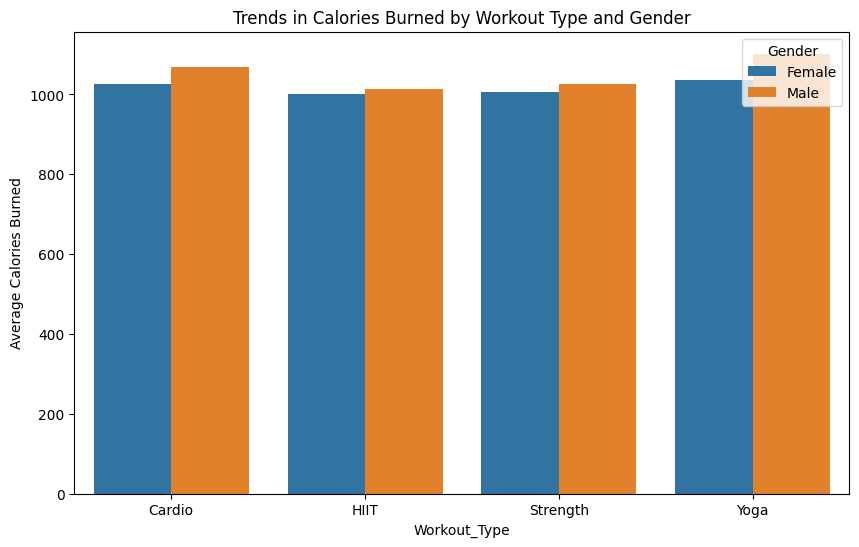

Correlation between Session_Duration and Calories_Burned: 0.03


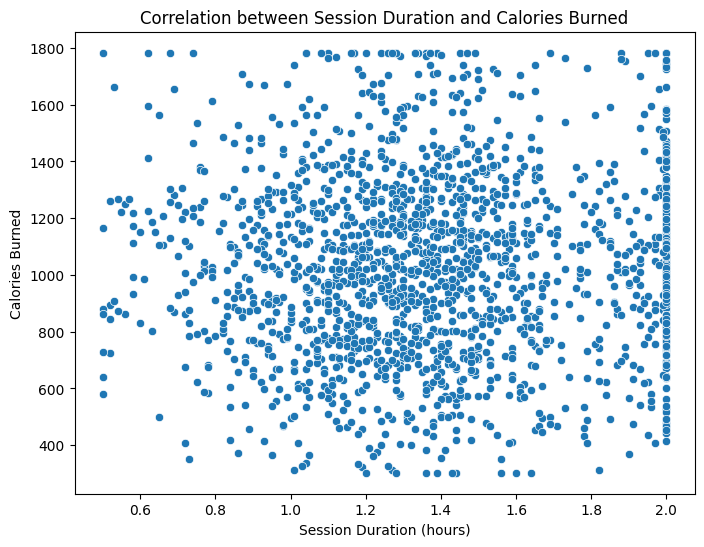

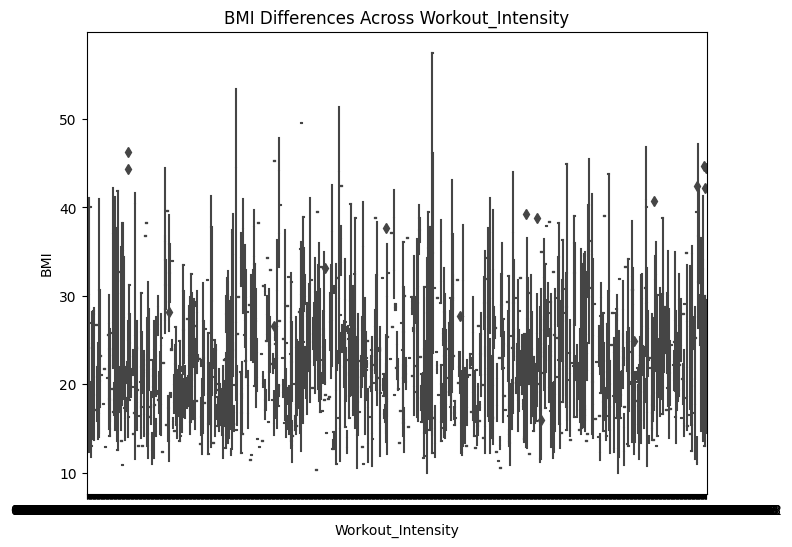

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

calories_by_workout_gender = df.groupby(['Workout_Type', 'Gender'])['Calories_Burned'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Workout_Type', y='Calories_Burned', hue='Gender', data=calories_by_workout_gender)
plt.title('Trends in Calories Burned by Workout Type and Gender')
plt.ylabel('Average Calories Burned')
plt.show()

correlation = df['Session_Duration (hours)'].corr(df['Calories_Burned'])
print(f"Correlation between Session_Duration and Calories_Burned: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=df)
plt.title('Correlation between Session Duration and Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Workout_Intensity', y='BMI', data=df)
plt.title('BMI Differences Across Workout_Intensity')
plt.xlabel('Workout_Intensity')
plt.ylabel('BMI')
plt.show()
